# Build the Linear Regression Model using Scikit Learn in Boston Data

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
import warnings#to remove warning from the notebook
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['price']=boston.target# Adding traget varibale to data

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.isnull().sum()#checking nan values 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

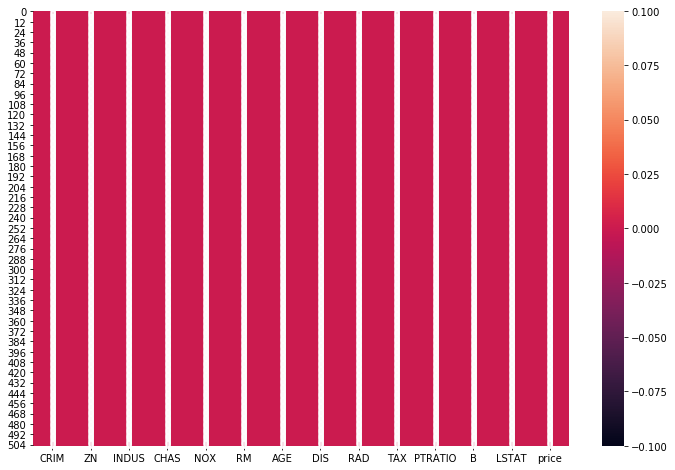

In [9]:
#Visually seeing null values by using heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),annot=True)

In [10]:
data.info()# checking all information about data like number of records having as well as data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


# Obserations from data :
1. starting with 0 and ending with 506 recordes 
2. all feature variable having numerical values (float)
3. we have 14 features  
4. there is no missing values presenting in data set
5.All the columns have numrical values, hence we dont need to do encoding for
  categorical values, in order to perform Linear Regression

In [11]:
data.describe()#Exploring the statistical information 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Without doing any feature engineering to Data we are creating model to check how it is performing

In [12]:
x=data.drop('price',axis=1)#features independent variables
y=data[['price']]#dependent variable

In [17]:
#sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
#Splitting data into training and testing part
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=142)

In [19]:
print('sample of x_train',x_train.shape)
print('sample of x_test',x_test.shape)
print('sample of y_train',y_train.shape)
print('sample of y_test',y_test.shape)

sample of x_train (354, 13)
sample of x_test (152, 13)
sample of y_train (354, 1)
sample of y_test (152, 1)


In [20]:
#Importing algorithm from sklearn
lr_model=LinearRegression()

In [21]:
#Training the Model
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Predicting the unseen feature by using model
predict=lr_model.predict(x_test)

In [23]:
import math
print('Mean_squared_error with respect test:',round(mean_squared_error(y_test,predict),2))
print('Root Mean_squared_error with respect test:',round(math.sqrt(mean_squared_error(y_test,predict)),2))
print('Mean_squared_error with respect train:',round(mean_squared_error(y_train,lr_model.predict(x_train)),2))
print('Root Mean_squared_error with respect train:',round(math.sqrt(mean_squared_error(y_train,lr_model.predict(x_train))),2))
print('R-square value of traing data:',round(lr_model.score(x_train,y_train),2))
print('R-square value of traing data:',round(lr_model.score(x_test,y_test),2))

Mean_squared_error with respect test: 25.92
Root Mean_squared_error with respect test: 5.09
Mean_squared_error with respect train: 20.59
Root Mean_squared_error with respect train: 4.54
R-square value of traing data: 0.75
R-square value of traing data: 0.71


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitting

In [27]:
slope_values_model1=lr_model.coef_

In [28]:
slope_values_model1=slope_values_model1.reshape(-1,1)

In [29]:
intercept_value_model1=lr_model.intercept_
intercept_value_model1

array([39.21006061])

# Plotting Residuals 

In [30]:
residuals=y_test-predict

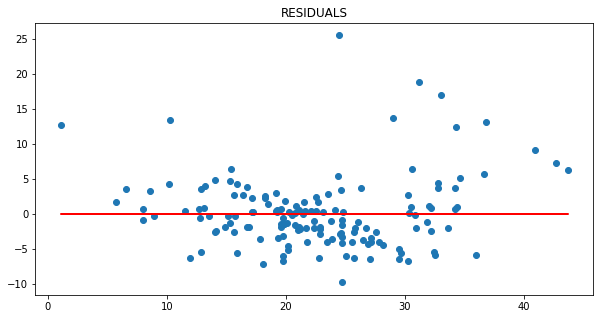

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(predict,residuals)
plt.plot(predict,np.zeros_like(predict),"r")
plt.title('RESIDUALS')
plt.show()

Text(0.5, 1.0, 'RESIDUALS')

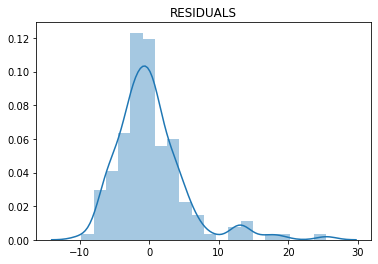

In [32]:
sns.distplot(residuals)
plt.title('RESIDUALS')


# Observations:
    1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic)
    but some residuals ploted far from center line may be those are outliers showed in histogram.
    2)residuals are followed Normal Distribution.

# APPLING LASSO,REDGE,ELASTICNET REGULARIZATION  METHODS TO DATA FOR OVERCOME FROM OVERFITTING 

In [33]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler 

# LASSO

In [34]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 10000, normalize = True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
print(alpha)
lassco_reg=Lasso(alpha)
lassco_reg.fit(x_train,y_train)
print('sample_test r2 value:',round(lassco_reg.score(x_test,y_test),2))
print('sample_train r2 value:',round(lassco_reg.score(x_train,y_train),2))

0.00035886573739580754
sample_test r2 value: 0.71
sample_train r2 value: 0.75


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitting

In [35]:
predict=lassco_reg.predict(x_test)
predict.shape

(152,)

In [36]:
predict=predict.reshape(-1,1)
predict.shape

(152, 1)

In [37]:
residulas=y_test-predict

In [38]:
slope['without_norm_losso']=lassco_reg.coef_

NameError: name 'slope' is not defined

In [39]:
slope

NameError: name 'slope' is not defined

In [40]:

print(lassco_reg.intercept_)

[39.13060234]


# PLOTTING RESIDUALS

Text(0.5, 0, 'RESIDULS')

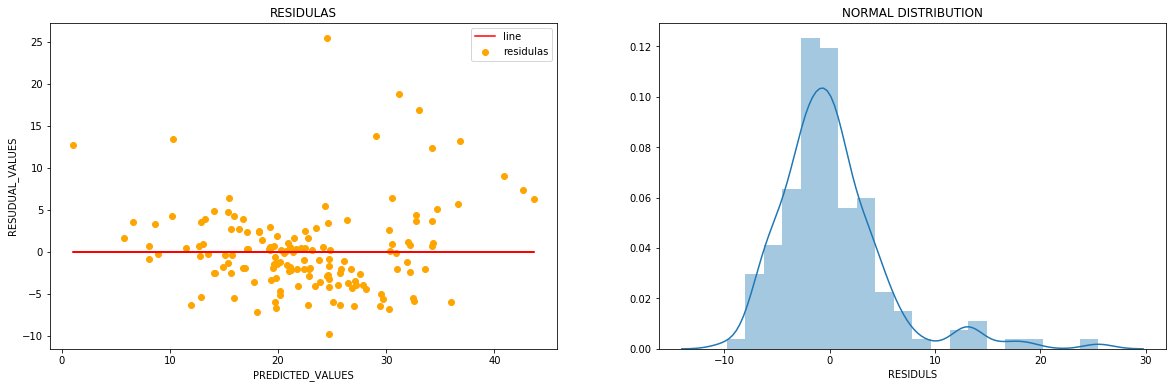

In [41]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:
    1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic)
    but some residuals ploted far from center line may be those are outliers showed in histogram.
    2)residuals are followed Normal Distribution.

# RIDGE

In [42]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
alpha=ridgecv.alpha_
print(alpha)
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
print('sample_test r^2 value:',round(ridge_model.score(x_test, y_test),2))
print('sample_train r^2 value:',round(ridge_model.score(x_train, y_train),2))

0.03640519487899119
sample_test r^2 value: 0.71
sample_train r^2 value: 0.75


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitting

In [43]:
predict=ridge_model.predict(x_test)
predict.shape

(152, 1)

In [44]:
residulas=y_test-predict

# PLOTTING RESIDUALS

Text(0.5, 0, 'RESIDULS')

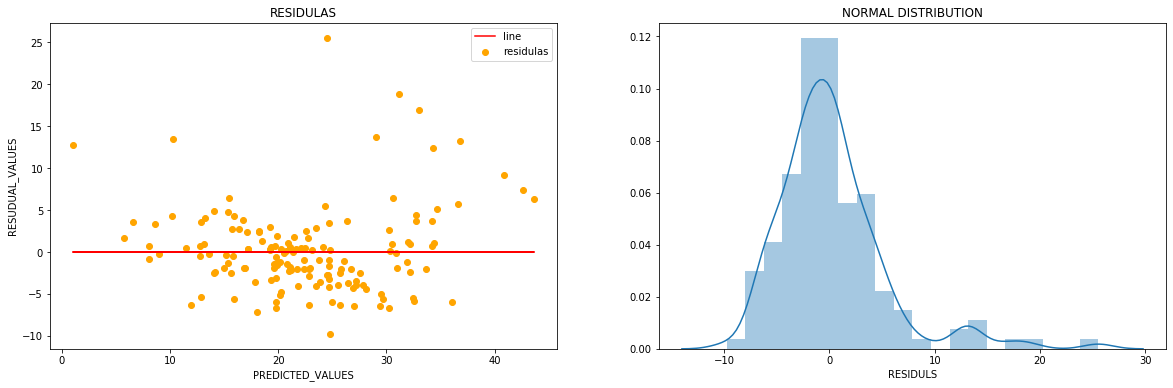

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:
    1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic)
    but some residuals ploted far from center line may be those are outliers showed in histogram.
    2)residuals are following Normal Distributions.

# ELASTICNET

In [46]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)
aplha=elasticCV.alpha_
print(alpha)
elasticCV.alpha_
elasticCV.l1_ratio
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
print('sample_test r^2 value:',round(elasticnet_reg.score(x_test,y_test),2))
print('sample_train r^2 value:',round(elasticnet_reg.score(x_train,y_train),2))

0.03640519487899119
sample_test r^2 value: 0.6
sample_train r^2 value: 0.69


# OBERVATION:
From Train and Test R^2 values showing that Model is not Overfitted.

In [47]:
predict=elasticnet_reg.predict(x_test)
predict.shape

(152,)

In [48]:
predict=predict.reshape(-1,1)
predict.shape

(152, 1)

In [49]:
resudulas=y_test-predict

# PLOTTING RESIDULAS

Text(0.5, 0, 'RESIDULS')

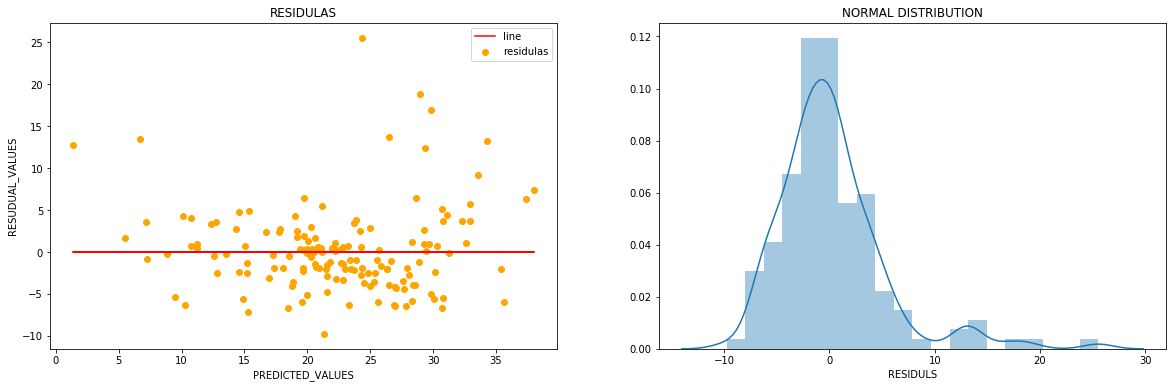

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:¶
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic)
but some residuals ploted far from center line may be those are outliers showed in histogram.
2)residuals are followed Normal Distribution.

# Normalization to Data

In [51]:
sacled=StandardScaler ()

In [52]:
x_scaled=sacled.fit_transform(x)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=33)

In [54]:
lr_model_norm=LinearRegression()

In [55]:
lr_model_norm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
predict=lr_model_norm.predict(x_test)
predict.shape

(152, 1)

In [57]:
print('Mean_squared_error with respect test:',round(mean_squared_error(y_test,predict),2))
print('Root Mean_squared_error with respect test:',round(math.sqrt(mean_squared_error(y_test,predict)),2))
print('Mean_squared_error with respect train:',round(mean_squared_error(y_train,lr_model_norm.predict(x_train)),2))
print('Root Mean_squared_error with respect train:',round(math.sqrt(mean_squared_error(y_train,lr_model_norm.predict(x_train))),2))
print('R-square value of traing data:',round(lr_model_norm.score(x_train,y_train),2))
print('R-square value of traing data:',round(lr_model_norm.score(x_test,y_test),2))

Mean_squared_error with respect test: 22.79
Root Mean_squared_error with respect test: 4.77
Mean_squared_error with respect train: 21.91
Root Mean_squared_error with respect train: 4.68
R-square value of traing data: 0.75
R-square value of traing data: 0.68


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitted.

In [58]:
coef_value2=lr_model_norm.coef_
lintercept_value=lr_model_norm.intercept_

In [59]:
residulas=y_test-predict

# PLOTTING RESIDULAS

Text(0.5, 0, 'RESIDULS')

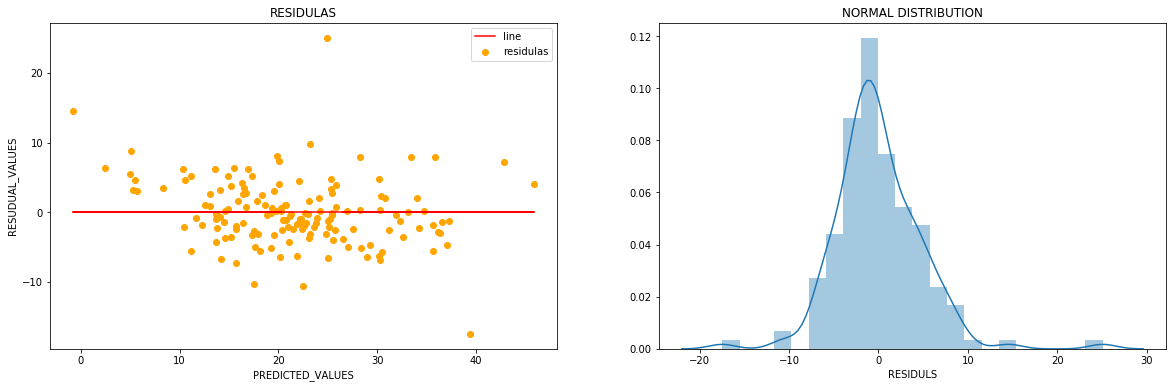

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# LASSO

In [61]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 10000, normalize = True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
print(alpha)
lassco_reg=Lasso(alpha)
lassco_reg.fit(x_train,y_train)
print('sample_test r2 value:',lassco_reg.score(x_test,y_test))
print('sample_train r2 value:',lassco_reg.score(x_train,y_train))

0.0012053126717210731
sample_test r2 value: 0.6847024921552505
sample_train r2 value: 0.7540588178217575


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitted.

In [62]:
predict=lassco_reg.predict(x_test)
predict.shape


(152,)

In [63]:
predict=predict.reshape(-1,1)

In [64]:
residulas=y_test-predict

In [65]:
coef_values4=lassco_reg.coef_
intercet_value=lassco_reg.intercept_

# PLOTTING RESIDULAS

Text(0.5, 0, 'RESIDULS')

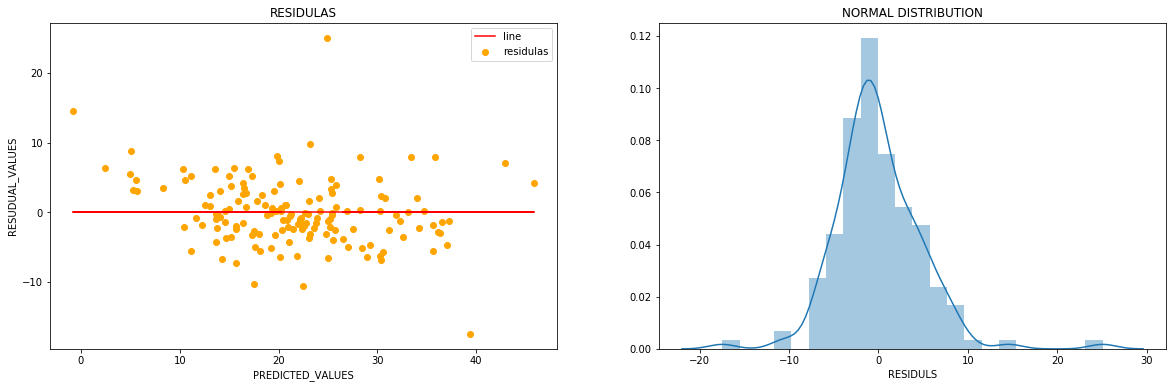

In [66]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:¶
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic) but some residuals ploted far from center line may be those are outliers showed in histogram. 2)Residuals are followed Normal Distribution.

# RIDGE

In [67]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
alpha=ridgecv.alpha_
print(alpha)
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
print('sample_test r^2 value:',ridge_model.score(x_test, y_test))
print('sample_train r^2 value:',ridge_model.score(x_train, y_train))

0.06911974365327866
sample_test r^2 value: 0.6846353234289505
sample_train r^2 value: 0.7540594985109843


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitted.

In [68]:
predict=ridge_model.predict(x_test)
predict.shape

(152, 1)

In [69]:
residulas=y_test-predict

In [70]:
coef_values6=ridge_model.coef_
intercept6=ridge_model.intercept_


# PLOTTING RESIDUALS

Text(0.5, 0, 'RESIDULS')

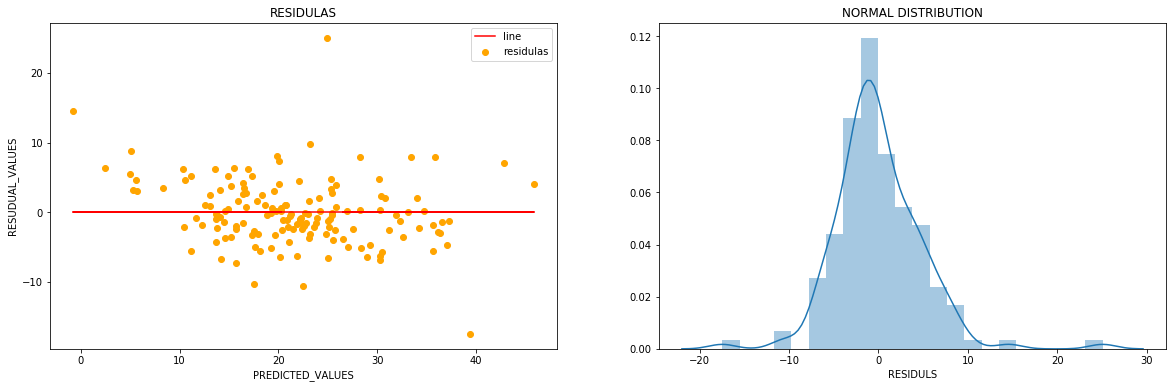

In [71]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic) but some residuals ploted far from center line may be those are outliers showed in histogram. 2)residuals are followed Normal Distribution.

# ELASTICNET

In [72]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)
aplha=elasticCV.alpha_
print(alpha)
elasticCV.alpha_
elasticCV.l1_ratio
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
print('sample_test r^2 value:',elasticnet_reg.score(x_test,y_test))
print('sample_train r^2 value:',elasticnet_reg.score(x_train,y_train))

0.06911974365327866
sample_test r^2 value: 0.6873285913581251
sample_train r^2 value: 0.7534079263155755


# OBERVATION:
From Train and Test R^2 values showing that Model is Overfitted.

In [76]:
predict=elasticnet_reg.predict(x_test)
predict=predict.reshape(-1,1)

In [77]:
residuals=y_test-predict

In [78]:
coef_values7=elasticnet_reg.coef_
intercept7=elasticnet_reg.intercept_

# PLOTTING RESIDULAS

Text(0.5, 0, 'RESIDULS')

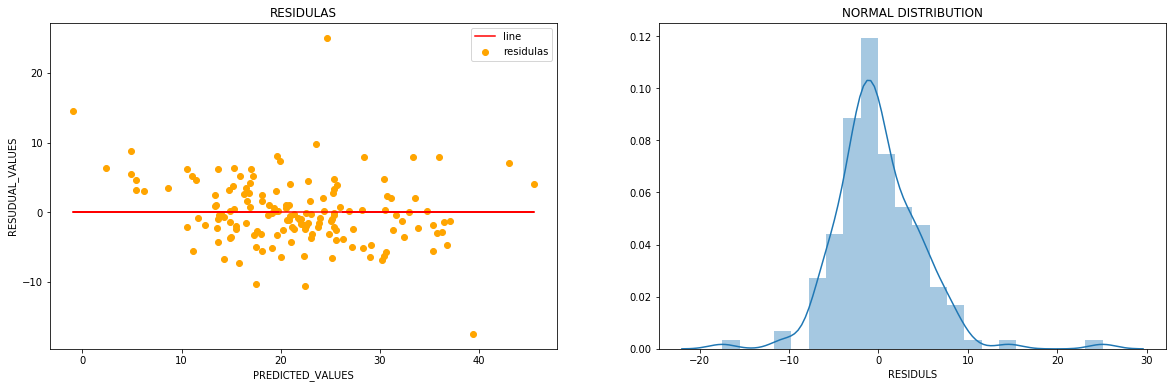

In [79]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# FEATURE ENGINEERING

In [80]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


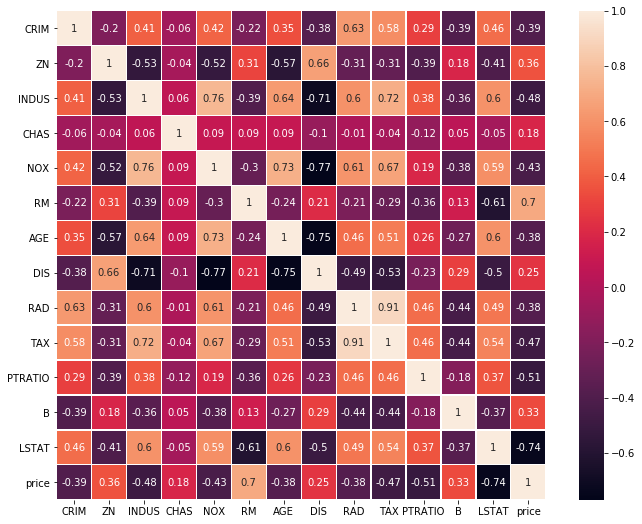

In [81]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr().round(2),annot=True,linewidths=0.2,square=True)

# Observation:
INDUS, RM, TAX, PTRATIO and LSTAT shows fairly good correlation with MEDV, 
NOX shows good correlation  with INDUS and AGE,
INDUS shows good correlation with LSAT and DIS,
DIS shows stron good correlation with INDUS, RM and AGE,
Hence Multicollinearity exists in this dataset,


In [82]:
df=data[['RM','TAX','PTRATIO','LSTAT','price']]

In [83]:
import scipy.stats as stat
import pylab 

In [84]:
def plot_data(df,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(df[feature])
    plt.subplot(1,3,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.subplot(1,3,3)
    sns.boxplot(df[feature])
    plt.show()

In [85]:
df1=df.copy()

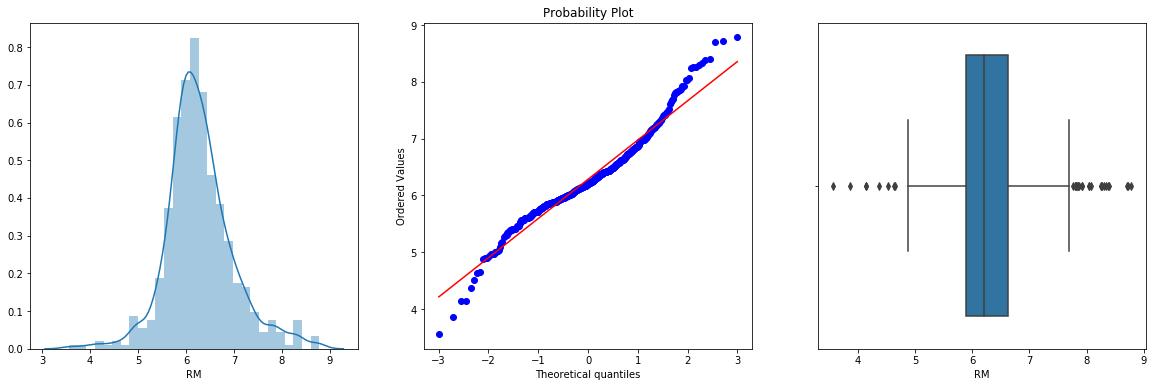

In [86]:
plot_data(df1,'RM')

# Observations:
1)RM feature is distributed normally RM.
2)feature having low and high level outliers.


In [87]:
df1.columns

Index(['RM', 'TAX', 'PTRATIO', 'LSTAT', 'price'], dtype='object')

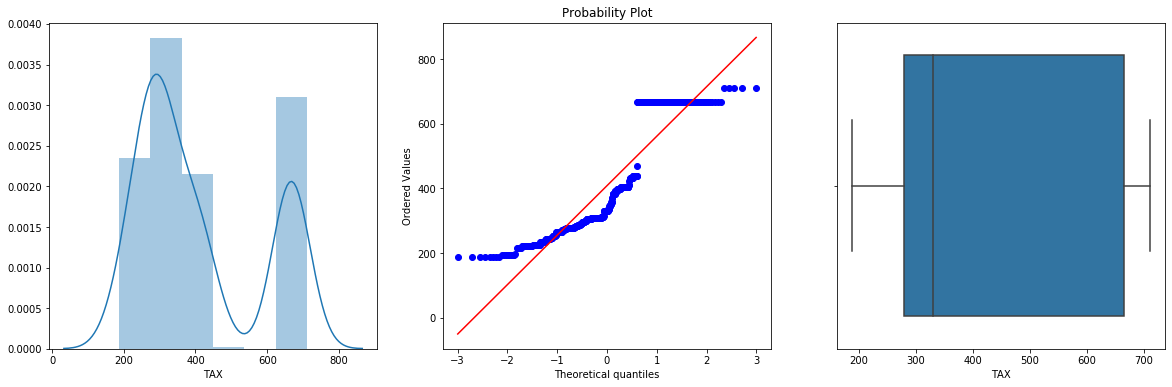

In [88]:
plot_data(df1,'TAX')

# Observations:
1)TAX feature is normal distributed but large values affected to the distribution 
2)TAX feature having high level outliers 


In [89]:
print(df1[['TAX','price']].corr())#correlations between feature variable to dependent variable

            TAX     price
TAX    1.000000 -0.468536
price -0.468536  1.000000


# Trying to bringing Distributions to Normal Distribution

In [90]:
#Converting variable to Exponential distribution
def exponential(data,feature):
    data_1=df1.copy()
    data_1[feature]=data_1[feature]**(1/1.2) 
    plot_data(data_1,feature)
    print('correlations between feature variable to dependent variable',data_1[[feature,'price']].corr())

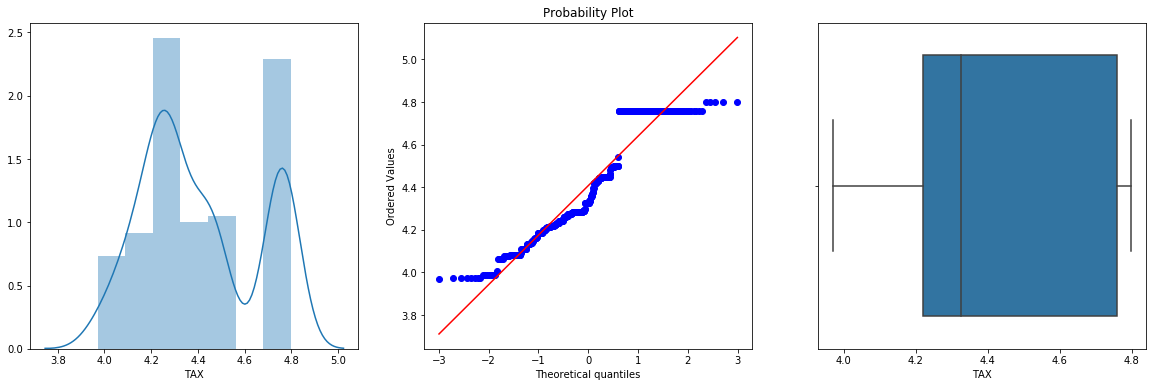

correlations between feature variable to dependent variable             TAX     price
TAX    1.000000 -0.474724
price -0.474724  1.000000


In [116]:
exponential(df1,'TAX')

In [117]:
#Converting variable to Square Root distribution
def squre_root(data,feature):
    data_1=df1.copy()
    data_1[feature]=data_1[feature]**(1/2) 
    plot_data(data_1,feature)
    print('correlations between feature variable to dependent variable',data_1[[feature,'price']].corr())

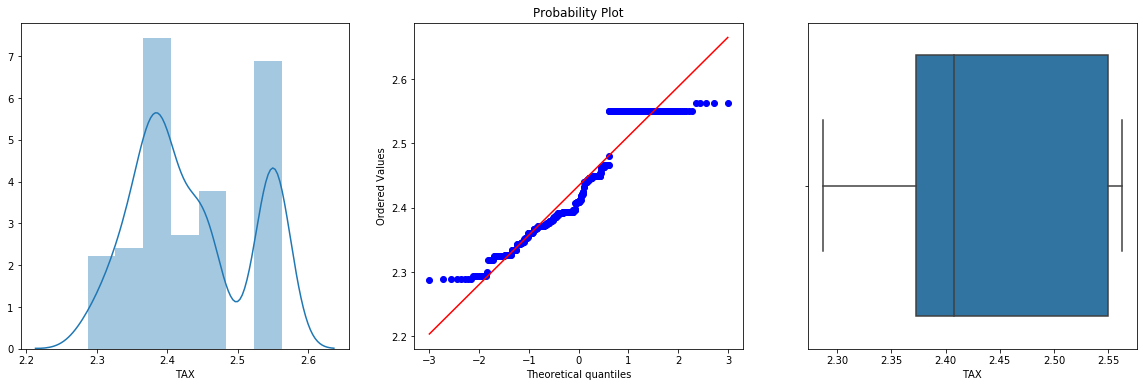

correlations between feature variable to dependent variable             TAX     price
TAX    1.000000 -0.474737
price -0.474737  1.000000


In [118]:
squre_root(df1,'TAX')

In [119]:
#Converting variable to lognormal distribution
def log_(data,feature):
    data_1=df1.copy()
    data_1[feature]=np.log(data_1[feature])
    plot_data(data_1,feature)
    print('correlations between feature variable to dependent variable',data_1[[feature,'price']].corr())

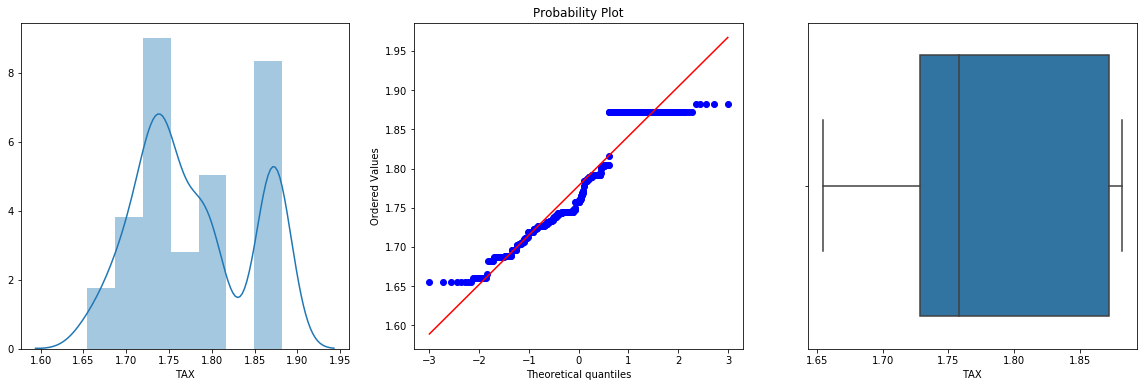

correlations between feature variable to dependent variable             TAX     price
TAX    1.000000 -0.474675
price -0.474675  1.000000


In [120]:
log_(df1,'TAX')

In [121]:
#Converting variable to boxcox 
def boxcox(data,feature):
    data_1=df1.copy()
    data_1[feature],parameter=stat.boxcox(data_1[feature])
    print(parameter)
    plot_data(data_1,feature)
    print('correlations between feature variable to dependent variable',data_1[[feature,'price']].corr())

-2.328568085283341


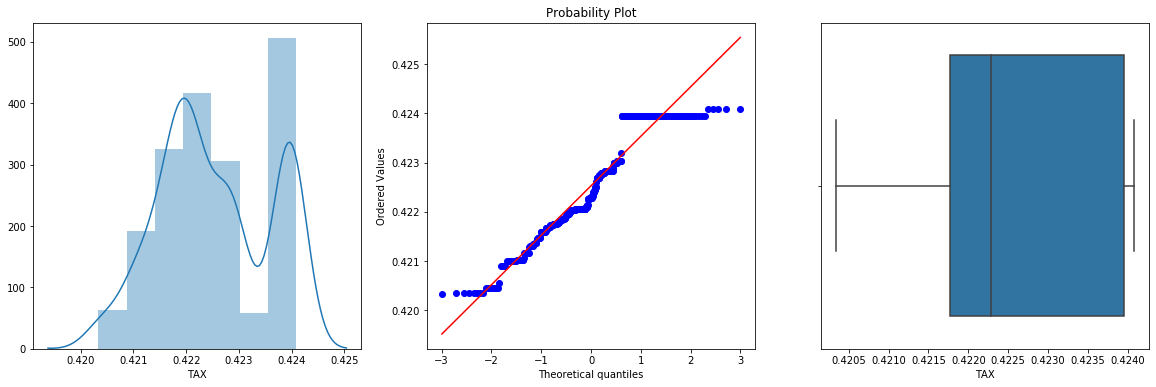

correlations between feature variable to dependent variable             TAX     price
TAX    1.000000 -0.472952
price -0.472952  1.000000


In [122]:
boxcox(df1,'TAX')

In [123]:
#Converting variable to Reciprocal 
def reciprocal(data,feature):
    data_1=df1.copy()
    data_1[feature]=1/(data_1[feature])
    plot_data(data_1,feature)
    print('correlations between feature variable to dependent variable',data_1[[feature,'price']].corr())

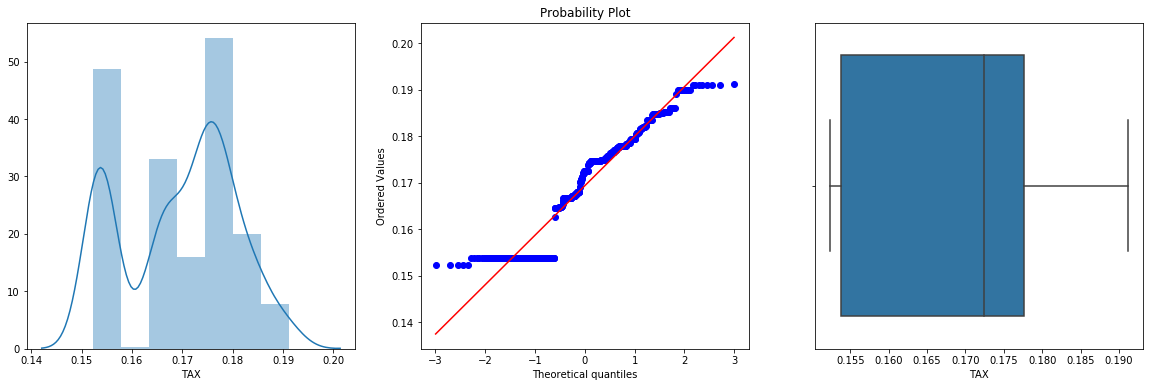

correlations between feature variable to dependent variable             TAX     price
TAX    1.000000  0.474236
price  0.474236  1.000000


In [124]:
reciprocal(df1,'TAX')


# Observation:
After checking all distribution transformations lognormal distribution given good correlation


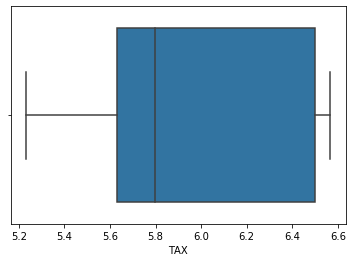

In [125]:
sns.boxplot(df1['TAX'])

In [126]:
df1['TAX']=np.log(df1['TAX'])

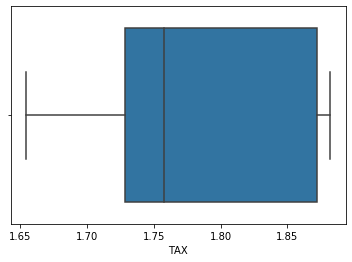

In [127]:
sns.boxplot(df1['TAX'])

In [128]:
df1.columns

Index(['RM', 'TAX', 'PTRATIO', 'LSTAT', 'price'], dtype='object')

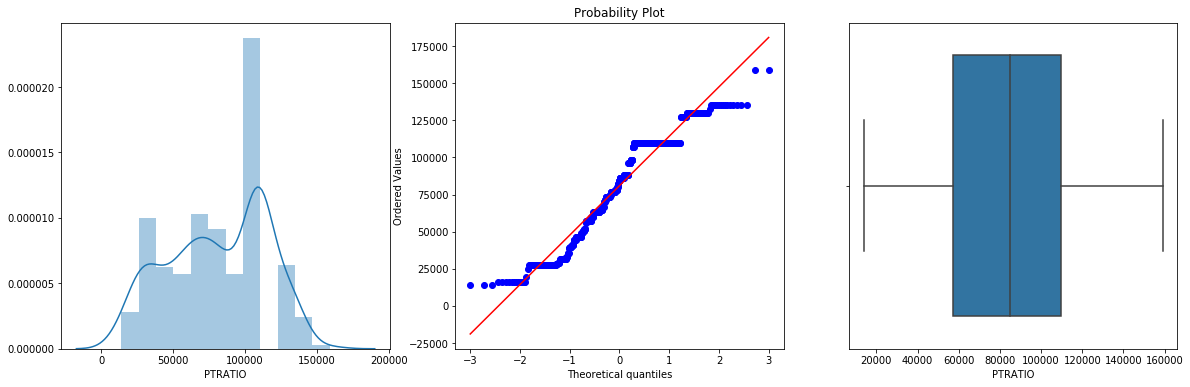

In [129]:
plot_data(df1,'PTRATIO')

In [130]:
print(df1[['PTRATIO','price']].corr())#correlations between feature variable to dependent variable

          PTRATIO     price
PTRATIO  1.000000 -0.511206
price   -0.511206  1.000000


# Observations:
1) PTRATIO feature is negative skewed distribution. 
2) PTRATIO feature having low level outliers


# Trying to bringing Distributions to Normal Distribution

In [131]:
def exponential(data,feature):
    data_1=df1.copy()
    data_1[feature]=data_1[feature]**(1/1.2) 
    plot_data(data_1,feature)
    print('correlations between feature variable to dependent variable',data_1[[feature,'price']].corr())

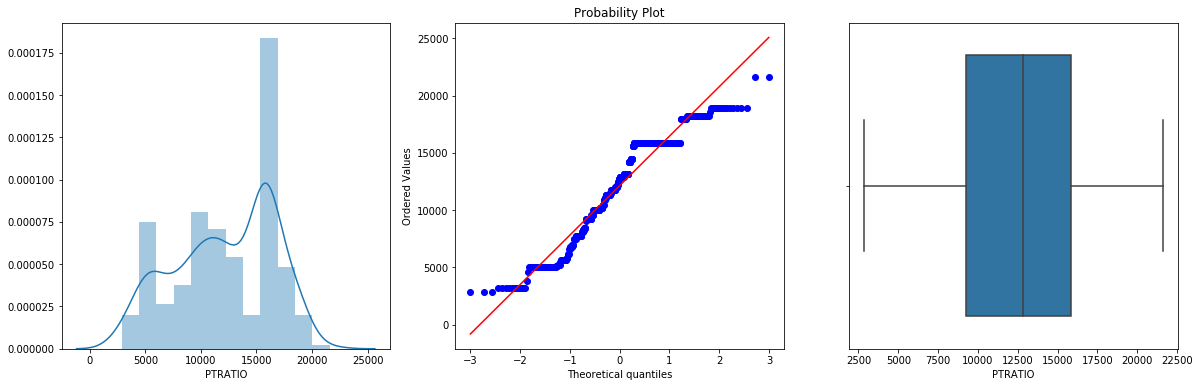

correlations between feature variable to dependent variable           PTRATIO     price
PTRATIO  1.000000 -0.511892
price   -0.511892  1.000000


In [132]:
exponential(df1,'PTRATIO')

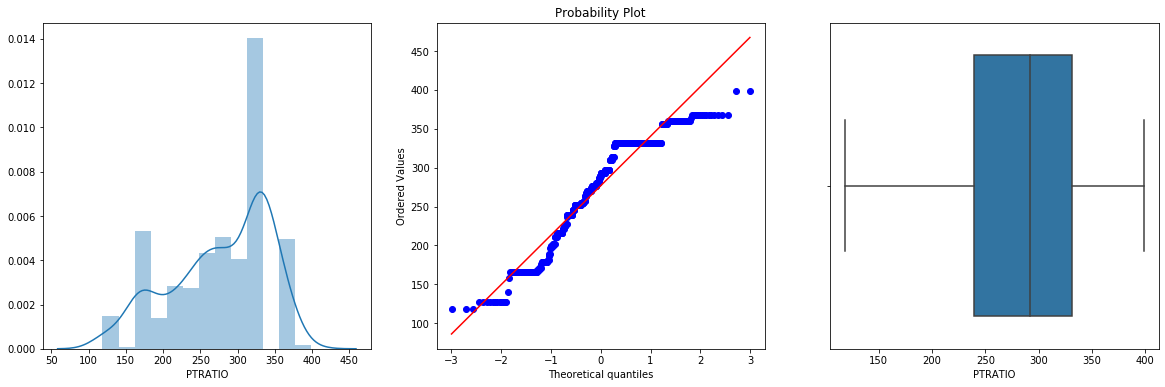

correlations between feature variable to dependent variable           PTRATIO     price
PTRATIO  1.000000 -0.510988
price   -0.510988  1.000000


In [133]:
squre_root(df1,'PTRATIO')

0.9999986805255334


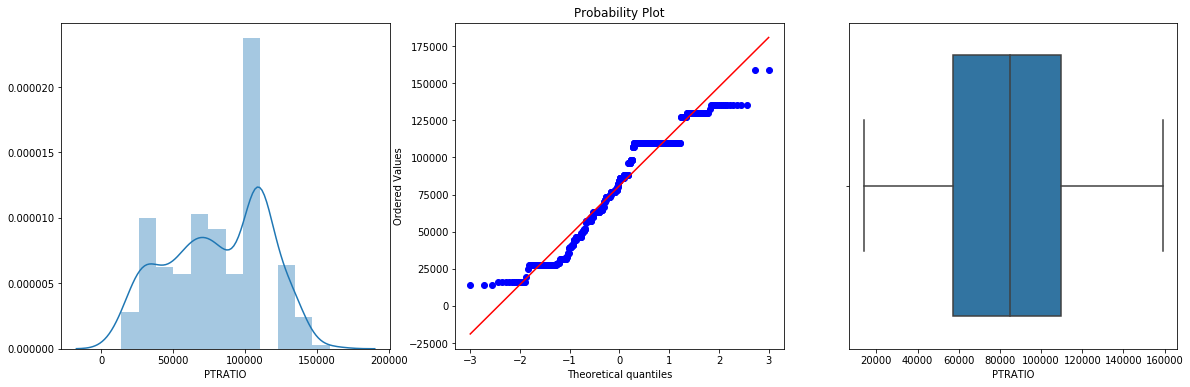

correlations between feature variable to dependent variable           PTRATIO     price
PTRATIO  1.000000 -0.511206
price   -0.511206  1.000000


In [134]:
boxcox(df1,'PTRATIO')

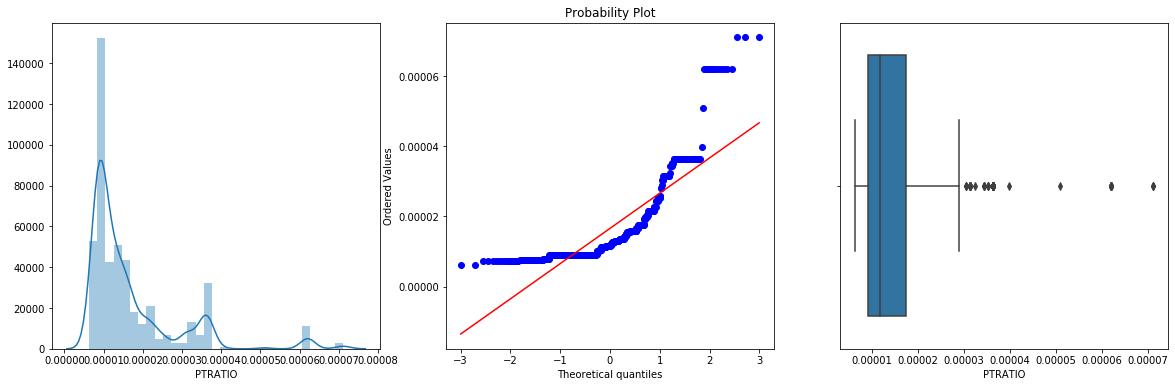

correlations between feature variable to dependent variable           PTRATIO     price
PTRATIO  1.000000  0.462178
price    0.462178  1.000000


In [135]:
reciprocal(df1,'PTRATIO')

# Observation:
After checking all distribution transformations boxcox distribution given good correlation

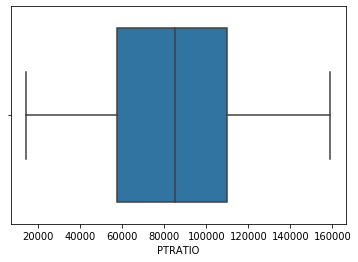

In [136]:
sns.boxplot(df1['PTRATIO'])

In [137]:
df1['PTRATIO'],parameter=stat.boxcox(df1['PTRATIO'])

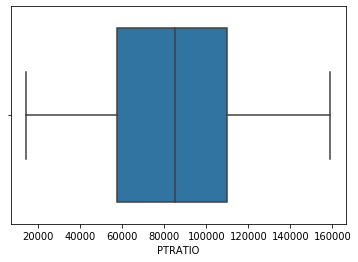

In [138]:
sns.boxplot(df1['PTRATIO'])

In [139]:
df1.columns

Index(['RM', 'TAX', 'PTRATIO', 'LSTAT', 'price'], dtype='object')

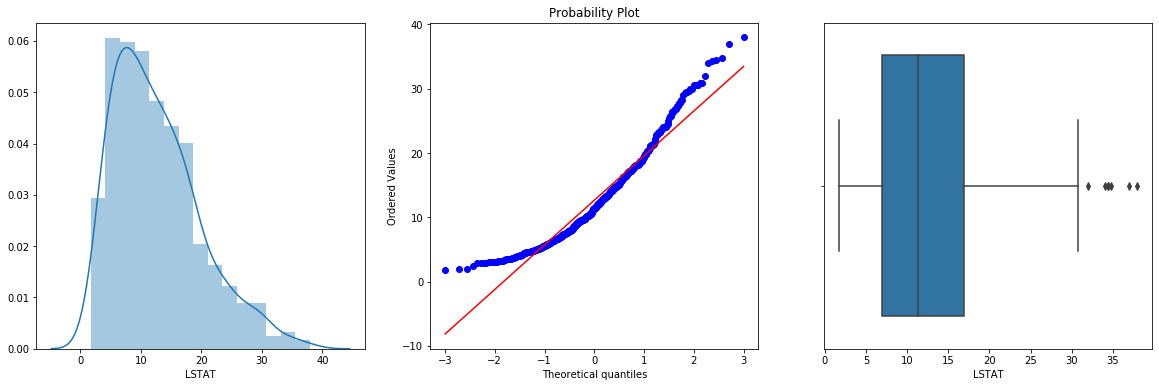

In [140]:
plot_data(df1,'LSTAT')

# Observations:
1) LSTAT feature is Normnal distributed. 
2) LSTAT feature having high level outliers


In [141]:
df1[['LSTAT','price']].corr()

,LSTAT,price
LSTAT,1.000000,-0.737663
price,-0.737663,1.000000


# Trying to bringing Distributions to Normal Distribution

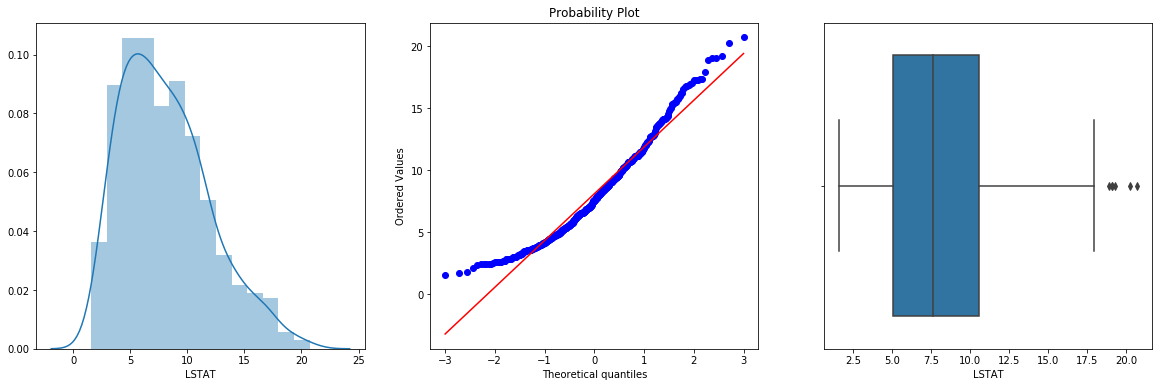

correlations between feature variable to dependent variable           LSTAT     price
LSTAT  1.000000 -0.754869
price -0.754869  1.000000


In [142]:
exponential(df1,'LSTAT')

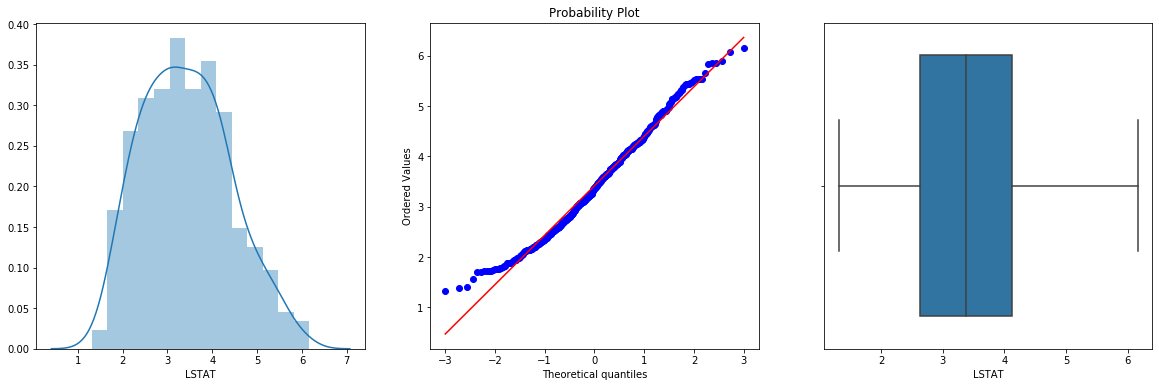

correlations between feature variable to dependent variable           LSTAT     price
LSTAT  1.000000 -0.785109
price -0.785109  1.000000


In [143]:
squre_root(df1,'LSTAT')

0.22776736893884023


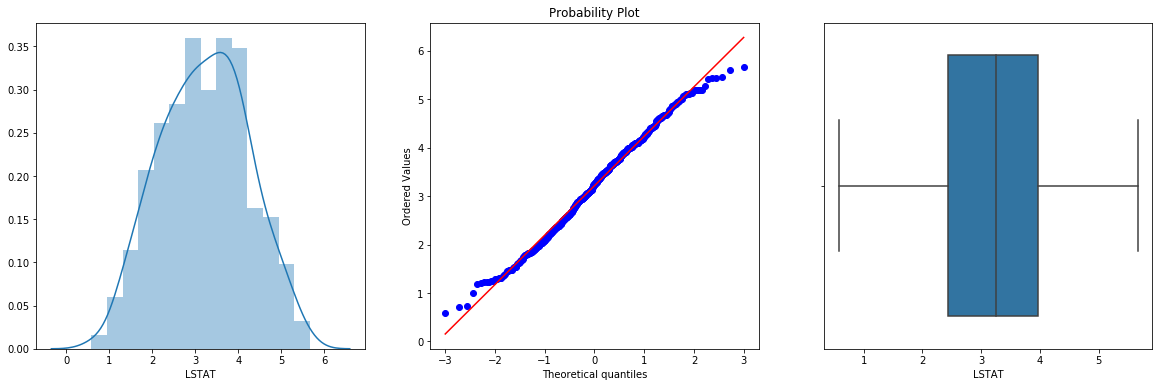

correlations between feature variable to dependent variable           LSTAT     price
LSTAT  1.000000 -0.804269
price -0.804269  1.000000


In [144]:
boxcox(df1,'LSTAT')

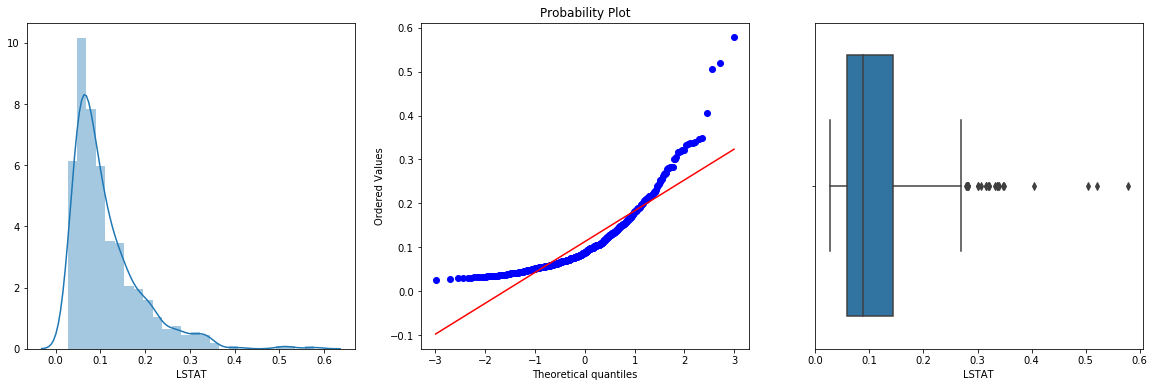

correlations between feature variable to dependent variable           LSTAT     price
LSTAT  1.000000  0.797218
price  0.797218  1.000000


In [145]:
reciprocal(df1,'LSTAT')

# Observation:
After checking all distribution transformations boxcox distribution given good correlation

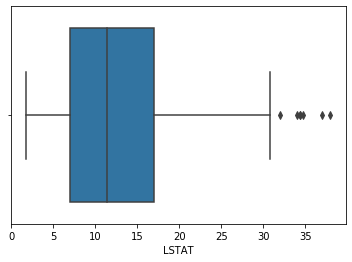

In [146]:
sns.boxplot(df1['LSTAT'])

In [147]:
df1['LSTAT'],parameter=stat.boxcox(df1['LSTAT'])

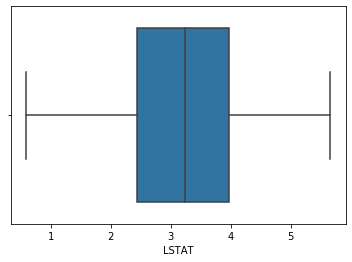

In [148]:
sns.boxplot(df1['LSTAT'])

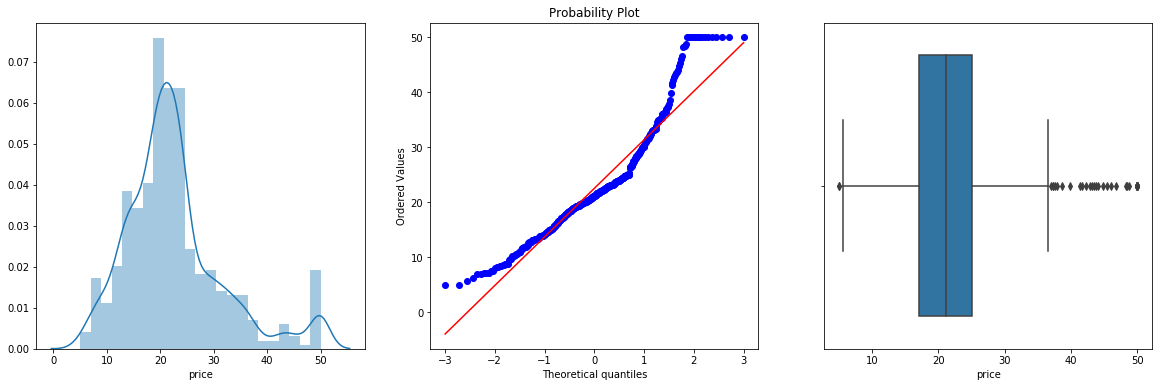

In [149]:
plot_data(df1,'price')

# Observations:
1) price independent variable is normal distributed. 
2) PTRATIO feature having low and high level outliers.


In [150]:
df1_price=df1.copy()

In [151]:
df1_price_outliers=df1_price['price'][df1_price['price']>=50]

In [152]:
df1_price_outliers

161    50.0
162    50.0
163    50.0
166    50.0
186    50.0
195    50.0
204    50.0
225    50.0
257    50.0
267    50.0
283    50.0
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: price, dtype: float64

In [153]:
df1_price['price'].loc[df1_price_outliers.keys()]=df1_price['price'].median()

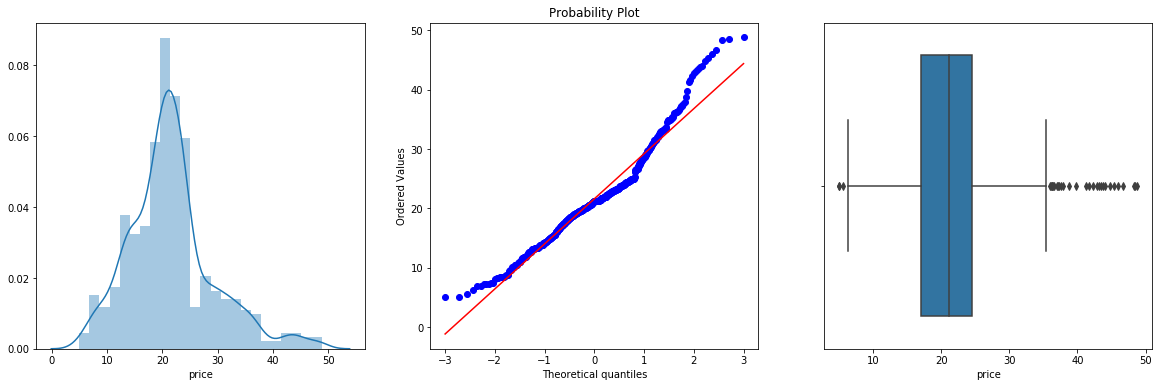

In [154]:
plot_data(df1_price,'price')

In [155]:
df1['price'].loc[df1_price_outliers.keys()]=df1['price'].median()

In [156]:
def normaldistribution(data):
    for feature in data.columns:
        sns.distplot(data[feature])
        plt.show()


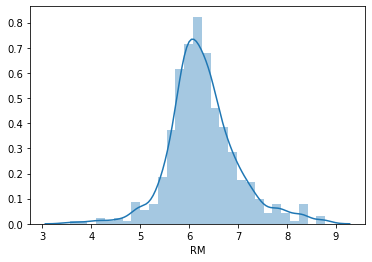

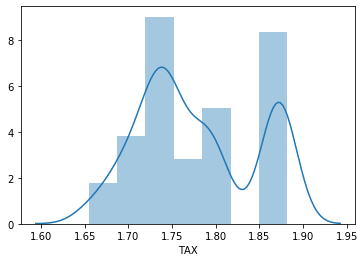

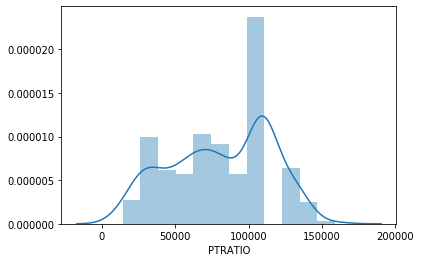

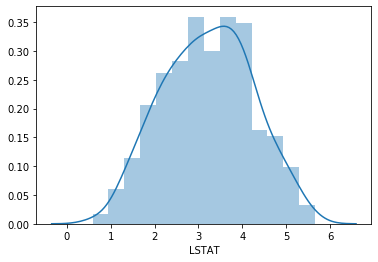

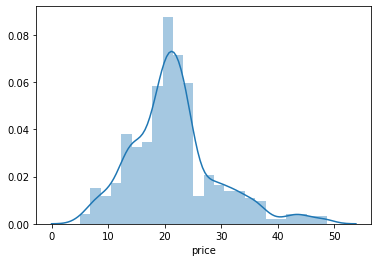

In [157]:
normaldistribution(df1)

# Observation:
All variables are normal distributed 


In [158]:
scale=StandardScaler()

In [159]:
x_features=df1.drop('price',axis=1)

In [160]:
y_variable=df1[['price']]

In [161]:
x_scaled=scale.fit_transform(x_features)

In [162]:
lr_model_df1=LinearRegression()

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_variable, test_size=0.3, random_state=99)

In [164]:
print('sample of x_train',x_train.shape)
print('sample of x_test',x_test.shape)
print('sample of y_train',y_train.shape)
print('sample of y_test',y_test.shape)

sample of x_train (354, 4)
sample of x_test (152, 4)
sample of y_train (354, 1)
sample of y_test (152, 1)


In [165]:
lr_model_df1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
predict=lr_model_df1.predict(x_test)

In [167]:
predict.shape

(152, 1)

In [168]:
print('Mean_squared_error with respect test:',round(mean_squared_error(y_test,predict),2))
print('Root Mean_squared_error with respect test:',round(math.sqrt(mean_squared_error(y_test,predict)),2))
print('Mean_squared_error with respect train:',round(mean_squared_error(y_train,lr_model_df1.predict(x_train)),2))
print('Root Mean_squared_error with respect train:',round(math.sqrt(mean_squared_error(y_train,lr_model_df1.predict(x_train))),2))
print('R-square value of traing data:',round(lr_model_df1.score(x_train,y_train),2))
print('R-square value of traing data:',round(lr_model_df1.score(x_test,y_test),2))

Mean_squared_error with respect test: 18.71
Root Mean_squared_error with respect test: 4.33
Mean_squared_error with respect train: 19.71
Root Mean_squared_error with respect train: 4.44
R-square value of traing data: 0.67
R-square value of traing data: 0.69


# Obervation:
From test and train R^2 values showing that Model is overfitted

In [169]:
residulas=y_test-predict

In [170]:
coef_values=lr_model_df1.coef_
intercept=lr_model_df1.intercept_

Text(0.5, 0, 'RESIDULS')

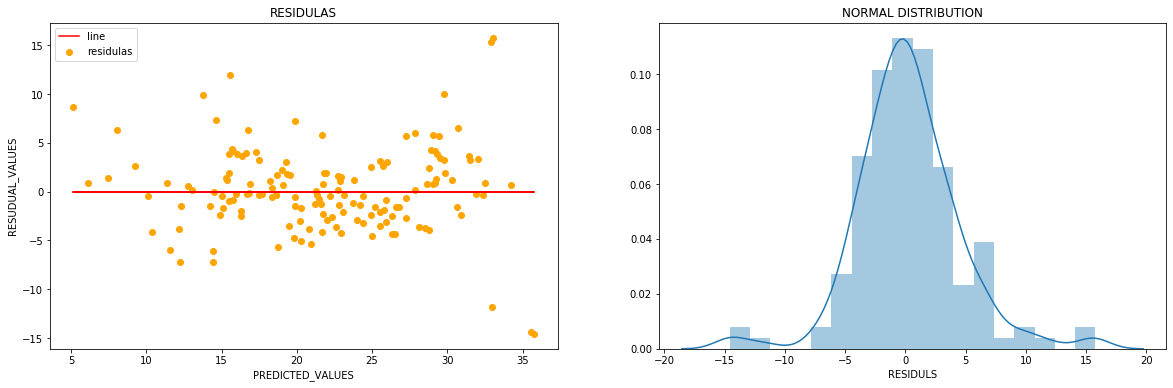

In [171]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic) but some residuals ploted far from center line may be those are outliers showed in histogram. 2)residuals are followed Normal Distribution.

# LASSO

In [172]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 10000, normalize = True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
print(alpha)
lassco_reg=Lasso(alpha)
lassco_reg.fit(x_train,y_train)
print('sample_test r2 value:',round(lassco_reg.score(x_test,y_test),2))
print('sample_train r2 value:',round(lassco_reg.score(x_train,y_train),2))

0.0015771043751724883
sample_test r2 value: 0.69
sample_train r2 value: 0.67


# Obervation:
From test and train R^2 values showing that Model is overfitted

In [173]:
predict=lassco_reg.predict(x_test)
predict=predict.reshape(-1,1)

In [174]:
residulas=y_test-predict

Text(0.5, 0, 'RESIDULS')

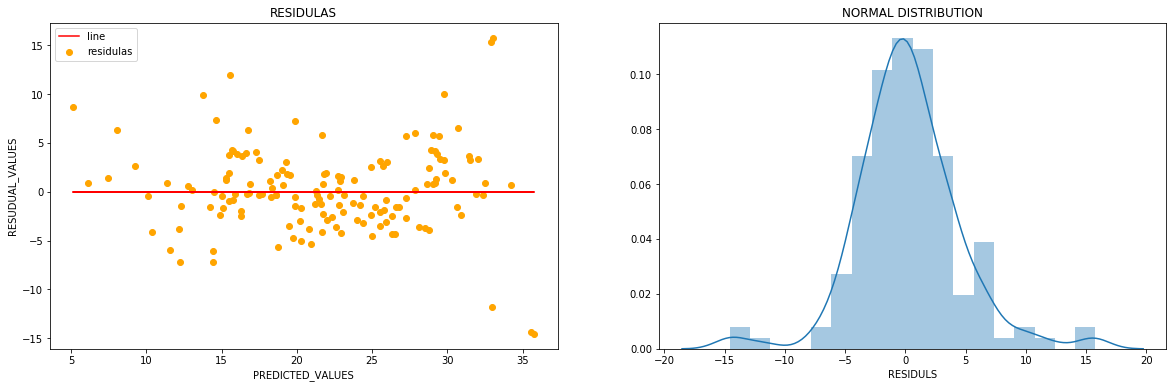

In [175]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic) but some residuals ploted far from center line may be those are outliers showed in histogram. 2)residuals are followed Normal Distribution.

# RIDGE

In [176]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
alpha=ridgecv.alpha_
print(alpha)
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
print('sample_test r^2 value:',round(ridge_model.score(x_test, y_test),2))
print('sample_train r^2 value:',round(ridge_model.score(x_train, y_train),2))

0.03091213925334846
sample_test r^2 value: 0.69
sample_train r^2 value: 0.67


# Obervation:
From test and train R^2 values showing that Model is overfitted

In [177]:
predict=ridge_model.predict(x_test)

In [178]:
residulas=y_test-predict

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

Text(0.5, 0, 'RESIDULS')

# Observations:
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic) but some residuals ploted far from center line may be those are outliers showed in histogram. 2)residuals are followed Normal Distribution.

# ELASTICNET

In [195]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)
aplha=elasticCV.alpha_
print(alpha)
elasticCV.alpha_
elasticCV.l1_ratio
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
print('sample_test r^2 value:',round(elasticnet_reg.score(x_test,y_test),2))
print('sample_train r^2 value:',round(elasticnet_reg.score(x_train,y_train),2))

0.0750883632985111
sample_test r^2 value: 0.69
sample_train r^2 value: 0.67


# Obervation:
From test and train R^2 values showing that Model is overfitted

In [196]:
predict=elasticnet_reg.predict(x_test)

In [197]:
predict=predict.reshape(-1,1)

In [198]:
predict.shape

(152, 1)

In [199]:
residuals=y_test-predict

Text(0.5, 0, 'RESIDULS')

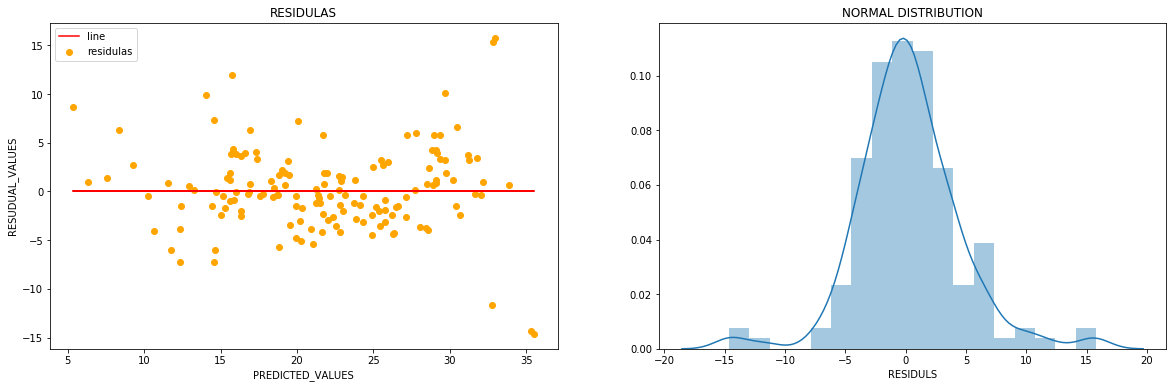

In [200]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(predict,residulas,c='orange',label='residulas')
plt.plot(predict,np.zeros_like(predict),label='line',c='r')
plt.legend()
plt.title('RESIDULAS')
plt.xlabel('PREDICTED_VALUES')
plt.ylabel('RESUDUAL_VALUES')
plt.subplot(1,2,2)
sns.distplot(residulas)
plt.title('NORMAL DISTRIBUTION')
plt.xlabel('RESIDULS')

# Observations:
1)residuals having no patteren and those are not increasing though out the line(Residuals(errors) are homoscedastic) but some residuals ploted far from center line may be those are outliers showed in histogram. 2)residuals are followed Normal Distribution.

# Conclusion

In [210]:
lr_model_df1.coef_

array([[ 1.30999627, -1.30773568, -1.25162855, -3.94682836]])

In [214]:
slope=pd.DataFrame(lr_model_df1.coef_,columns=x_features.columns,index=[['slope_value']])

In [215]:
slope

,RM,TAX,PTRATIO,LSTAT
slope_value,1.309996,-1.307736,-1.251629,-3.946828


In [219]:
lr_model_df1.intercept_

array([21.54918504])

# Conclusion :
1) Feature engineering helped us to get better stable accuracy with less feature selection
2) Slope values as showed in slope data table is given better R^2 values in both cases test and train phases
3) finnal intercept and slope values are [21.55], [1.31,-3,-1.25,-3.94]

